In [243]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [244]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Define wrapper functions

In [245]:
def weight_variable(shape):
    """ Create TensorFlow weight with initial noise. """
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """ Create TensorFlow bias with initial value of 0.1. """
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """ 2D TensorFlow convolution with stride of 1 and zero padding. """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """ TensorFlow max pooling over 2x2 blocks. """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')

def imshow(img, scale=None):

    # Assign default scale
    if not scale:
        scale = [np.min(img), np.max(img)]

    # Set up image plot
    plt.imshow(img, cmap='gray', vmin=scale[0], vmax=scale[1])
    plt.xticks([]), plt.yticks([])

    # Show
    plt.show()

#### Construct network

In [246]:
# Define variables
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 784])

In [247]:
## Layer 1 (Convolutional)

# Create weights
n_feat_1 = 4
W_conv1 = weight_variable([5, 5, 1, n_feat_1])
b_conv1 = bias_variable([n_feat_1])

# Reshape image
# -1 allows tf.reshape to infer that dimension
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolve image
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

In [248]:
## Layer 2 (Convolutional)

# Create weights
W_conv2 = weight_variable([5, 5, n_feat_1, 1])
b_conv2 = bias_variable([1])

# Convolve image
h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2)

In [249]:
## Apply dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_conv2, keep_prob)

In [250]:
## Readout layer

# Create weights
#W_fc2 = weight_variable([1024, 10])
#b_fc2 = bias_variable([10])

# Compute output
#y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_conv = tf.reshape(h_fc1_drop, [-1, 784])

#### Train network

step     0, current score 0.145489


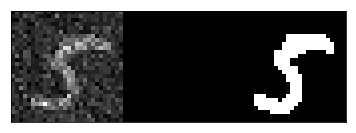

step  1000, current score 0.0428444


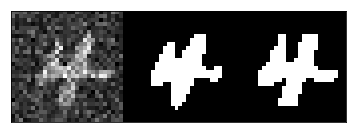

step  2000, current score 0.0382423


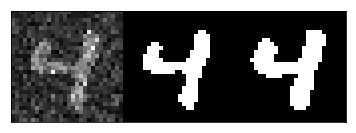

step  3000, current score 0.0357658


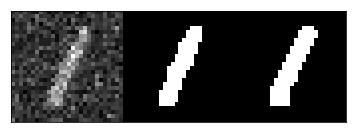

step  4000, current score 0.0326071


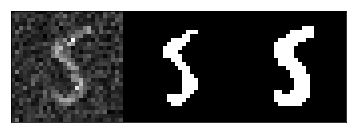

step  5000, current score 0.0323361


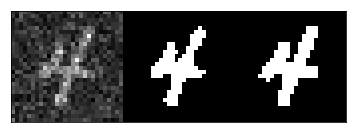

step  6000, current score 0.0294562


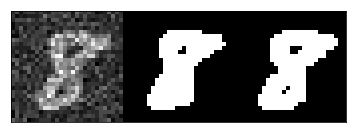

step  7000, current score 0.0298304


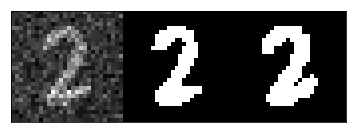

step  8000, current score 0.0274066


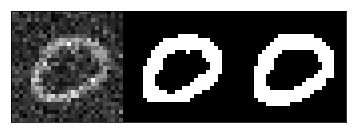

step  9000, current score 0.0284555


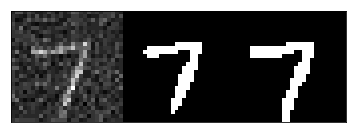

step 10000, current score 0.0261132


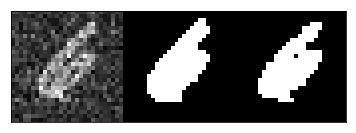

step 11000, current score 0.0268829


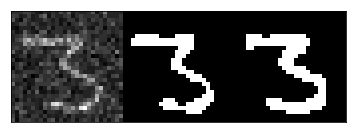

step 12000, current score 0.0270227


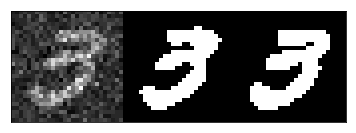

step 13000, current score 0.0263074


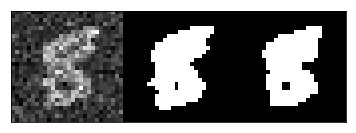

step 14000, current score 0.0280698


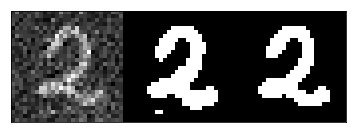

step 15000, current score 0.0245763


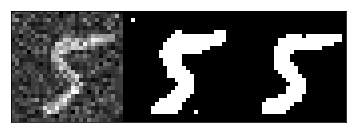

step 16000, current score 0.0275168


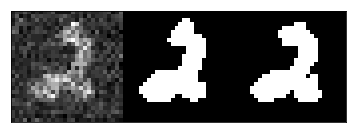

step 17000, current score 0.0270441


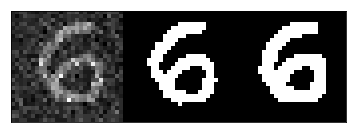

step 18000, current score 0.0229029


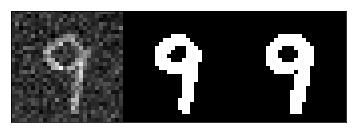

step 19000, current score 0.025464


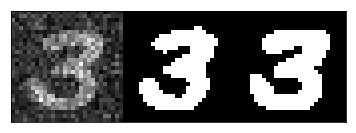

step 20000, current score 0.0251466


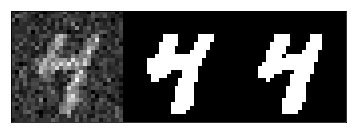

step 21000, current score 0.024342


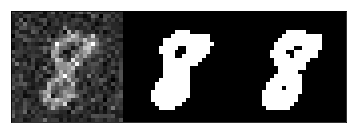

step 22000, current score 0.0256874


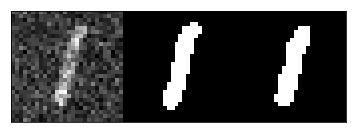

step 23000, current score 0.0246805


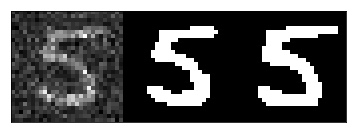

step 24000, current score 0.0254793


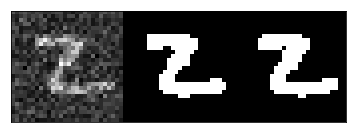

step 25000, current score 0.0233701


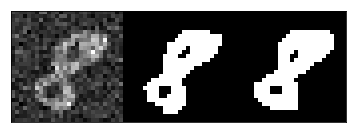

step 26000, current score 0.0228647


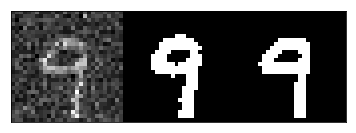

step 27000, current score 0.0236738


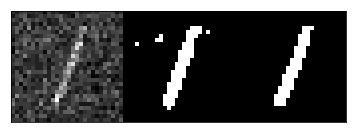

step 28000, current score 0.0244641


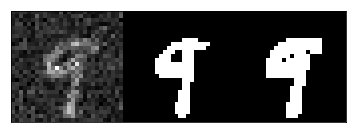

step 29000, current score 0.0251006


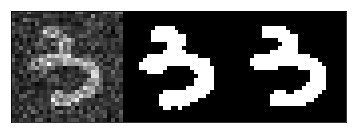

step 30000, current score 0.0249301


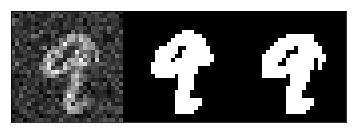

step 31000, current score 0.0257842


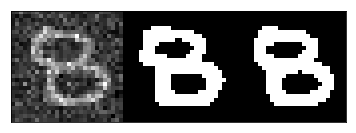

step 32000, current score 0.0239321


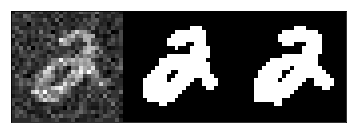

step 33000, current score 0.0233264


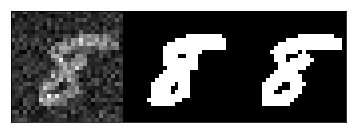

step 34000, current score 0.0243346


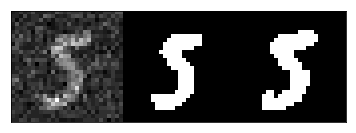

step 35000, current score 0.0221229


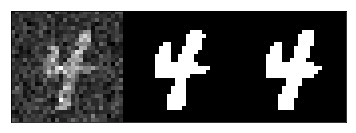

step 36000, current score 0.0232039


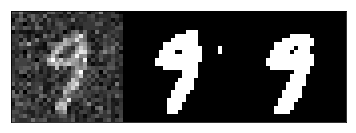

step 37000, current score 0.0225277


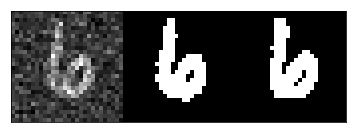

step 38000, current score 0.0250357


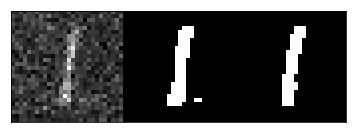

step 39000, current score 0.0240676


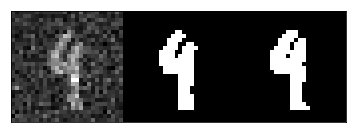

step 40000, current score 0.0251197


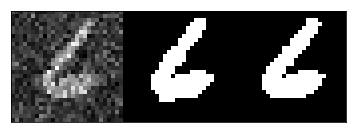

step 41000, current score 0.0217767


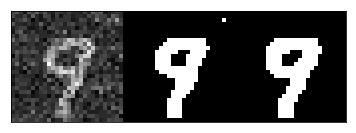

step 42000, current score 0.024053


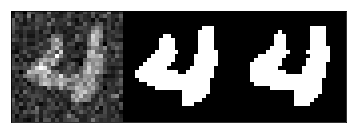

step 43000, current score 0.0254949


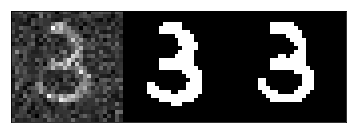

step 44000, current score 0.0239107


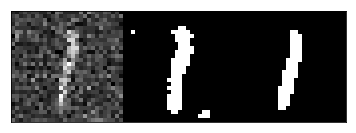

step 45000, current score 0.0236924


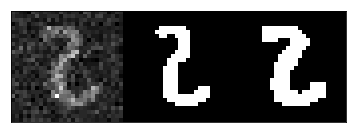

step 46000, current score 0.0244449


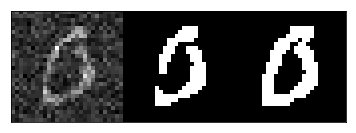

step 47000, current score 0.0238108


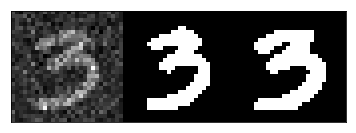

step 48000, current score 0.022277


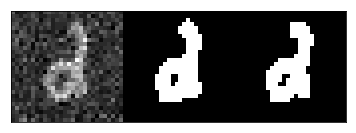

step 49000, current score 0.0230383


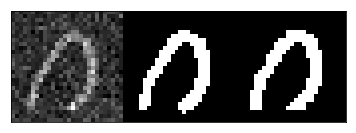

In [251]:
# Build training function
cross_entropy = tf.reduce_mean(tf.square(y_ - y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Build accuracy measure
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:

    # Initialize variables
    sess.run(tf.global_variables_initializer())

    # Iterate through 
    for i in range(50000):
        
        # Import next batch
        # batch = (data, labels)
        # data: 50 x 784, labels: 50 x 10
        batch = mnist.train.next_batch(50)
        #noise_batch = batch[0] + 0.7*np.random.rand(*batch[0].shape)
        noise_batch = np.random.poisson(10*(batch[0]+0.5))*1.0
        for idx in range(noise_batch.shape[0]):
            noise_batch[idx] = noise_batch[idx]/np.max(noise_batch[idx])

        # Report iteration stats
        if i % 1000 == 0:
            train_accuracy = cross_entropy.eval(feed_dict={x: noise_batch,
                                                      y_: batch[0]>0,
                                                      keep_prob: 1})
            print('step {:5d}, current score {:g}'.format(
                i, train_accuracy))
            
            test = y_conv.eval(feed_dict={x: noise_batch, keep_prob: 1})
            test = np.reshape(np.round(test[0, :]), (28, 28))
            comp = np.reshape(noise_batch[0,:], (28,28))
            true = np.reshape(batch[0][0,:]>0, (28,28))
            imshow(np.hstack((comp, test, true)), [0, 1])

        # Train network
        train_step.run(feed_dict={x: noise_batch,
                                  y_: batch[0]>0, keep_prob: 1})

    result_kernel = np.squeeze(np.array(W_conv1.eval()))
    kernel1 = np.array(W_conv1.eval())
    kernel2 = np.array(W_conv2.eval())

#### Visualize batch element

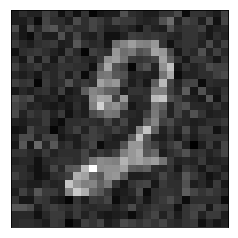

In [252]:
imshow(np.reshape(np.random.poisson(20*(batch[0][1]+0.5)), (28, 28)))

In [253]:
def unroll_tensor(kernel):
    """ Convert ND tensor to 2D for visualization. """
    dim = kernel.shape[0]*kernel.shape[1]*kernel.shape[2]*kernel.shape[3]
    return np.reshape(kernel, (int(dim/kernel.shape[0]/2), -1))

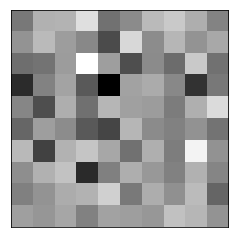

In [254]:
imshow(unroll_tensor(kernel1))

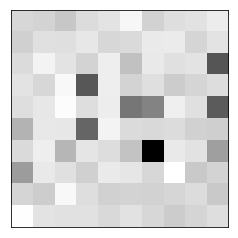

In [255]:
imshow(unroll_tensor(kernel2))